<a href="https://colab.research.google.com/github/Mirlaa/Problemas-Classicos/blob/main/Projeto_problemas_cl%C3%A1ssicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### **Importando os dados**

In [ ]:
import pandas as pd

pd.set_option('max_columns',None)

In [ ]:
dados = pd.read_csv('/content/nyc-rolling-sales.csv')

In [ ]:
dados.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### **Limpeza e tratamento de dados**

Removendo colunas que não são interessantes para a análise

In [ ]:
dados.drop(['Unnamed: 0', 
            'ADDRESS', 
            'APARTMENT NUMBER', 
            'ZIP CODE', 
            'SALE DATE',
            'TOTAL UNITS'], 
           axis = 1, inplace = True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   RESIDENTIAL UNITS               84548 non-null  int64 
 9   COMMERCIAL UNITS                84548 non-null  int64 
 10  LAND SQUARE FEET                84548 non-null  object
 11  GROSS SQUARE FEET               84548 non-null  object
 12  YEAR BUILT                      84548 non-null

Explorando as variáveis categóricas

In [ ]:
variaveis_categoricas = ['BOROUGH', 
                         'NEIGHBORHOOD', 
                         'BUILDING CLASS CATEGORY', 
                         'BUILDING CLASS AT PRESENT',
                         'BUILDING CLASS AT TIME OF SALE',
                         'EASE-MENT',
                         'TAX CLASS AT TIME OF SALE',
                         'TAX CLASS AT PRESENT']
for coluna in variaveis_categoricas:
    print(f'{coluna.capitalize()}:  {dados[coluna].unique()}')
    print('-'*10)

Borough:  [1 2 3 4 5]
----------
Neighborhood:  ['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 'FORDHAM' 'HIGHBRIDGE/MORRIS HEIGHTS' 'HUN

In [ ]:
variaveis_categoricas.remove('BOROUGH')
variaveis_categoricas.remove('TAX CLASS AT PRESENT')

In [ ]:
dados.drop(columns = variaveis_categoricas, axis = 1, inplace=True)

Substituindo valores da coluna classe da taxa com base no glossário de dados

In [ ]:
dicionario_tax = {
    '2A': '2',
    '2B': '2',
    '2C': '2',
    '1C': '1',
    '1A': '1',
    '1B': '1'
}

In [ ]:
dados['TAX CLASS AT PRESENT'] = dados['TAX CLASS AT PRESENT'].replace(dicionario_tax)

In [ ]:
dados.head()

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,2,392,6,5,0,1633,6440,1900,6625000
1,1,2,399,26,28,3,4616,18690,1900,-
2,1,2,399,39,16,1,2212,7803,1900,-
3,1,2,402,21,10,0,2272,6794,1913,3936272
4,1,2,404,55,6,0,2369,4615,1900,8000000


Removendo dados inconsistentes da base de dados

In [ ]:
(dados == ' ').any()

BOROUGH                 False
TAX CLASS AT PRESENT     True
BLOCK                   False
LOT                     False
RESIDENTIAL UNITS       False
COMMERCIAL UNITS        False
LAND SQUARE FEET        False
GROSS SQUARE FEET       False
YEAR BUILT              False
SALE PRICE              False
dtype: bool

In [ ]:
(dados['TAX CLASS AT PRESENT'] == ' ').sum()/dados.shape[0]

0.008728769456403463

In [ ]:
dados.iloc[1,-1]

' -  '

In [ ]:
(dados == ' -  ').any()

BOROUGH                 False
TAX CLASS AT PRESENT    False
BLOCK                   False
LOT                     False
RESIDENTIAL UNITS       False
COMMERCIAL UNITS        False
LAND SQUARE FEET         True
GROSS SQUARE FEET        True
YEAR BUILT              False
SALE PRICE               True
dtype: bool

Encontrando a porcentagem de dados inconsistentes em relação a quantidade de dados total para decidir quais colunas serão totalmente removidas ou se apenas os dados inconsistentes serão eliminados.

In [ ]:
(dados['LAND SQUARE FEET'] == ' -  ').sum()/dados.shape[0]

0.31049817854946304

In [ ]:
(dados['GROSS SQUARE FEET'] == ' -  ').sum()/dados.shape[0]

0.32658371575909545

In [ ]:
(dados['SALE PRICE'] == ' -  ').sum()/dados.shape[0]

0.17222169655107158

Com base no glossário de dados, existem valores de preço de venda iguais a 0, que identificam imóveis que trocaram de dono e não representam uma venda. Desse modo, vamos remover esses valores.

In [ ]:
selecao = (dados['TAX CLASS AT PRESENT'] == ' ') | (dados['SALE PRICE'] == ' -  ') | (dados['SALE PRICE'] == '0')

In [ ]:
dados.drop(columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET'], axis = 1, inplace = True)

In [ ]:
dados = dados[~selecao]

In [ ]:
dados.head()

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,YEAR BUILT,SALE PRICE
0,1,2,392,6,5,0,1900,6625000
3,1,2,402,21,10,0,1913,3936272
4,1,2,404,55,6,0,1900,8000000
6,1,2,406,32,8,0,1920,3192840
9,1,2,387,153,24,0,1920,16232000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59166 entries, 0 to 84547
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   BOROUGH               59166 non-null  int64 
 1   TAX CLASS AT PRESENT  59166 non-null  object
 2   BLOCK                 59166 non-null  int64 
 3   LOT                   59166 non-null  int64 
 4   RESIDENTIAL UNITS     59166 non-null  int64 
 5   COMMERCIAL UNITS      59166 non-null  int64 
 6   YEAR BUILT            59166 non-null  int64 
 7   SALE PRICE            59166 non-null  object
dtypes: int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
dados['SALE PRICE'] = dados['SALE PRICE'].astype('float64')

Analisando a distribuição da variável Preço de venda, para encontrar possíveis outliers

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


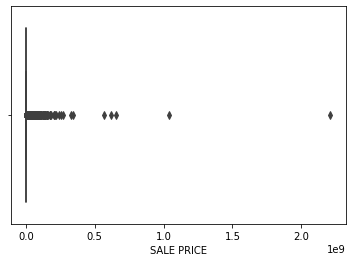

In [ ]:
sns.boxplot(dados['SALE PRICE']);

É perceptível que a distribuição dos dados é não uniforme, e há a presença de muitos outliers, o que pode impactar o resultado de um modelo de regressão. Vamos remover valores muito discrepantes e realizar uma transformação nos dados pela escala logarítmica.

In [ ]:
dados.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,YEAR BUILT,SALE PRICE
count,59166.000000,59166.000000,59166.000000,59166.000000,59166.000000,59166.000000,5.916600e+04
mean,2.945188,4163.926072,381.754352,1.745530,0.164807,1828.183720,1.483985e+06
std,1.327381,3574.487855,666.986539,14.229118,9.870400,474.643217,1.234581e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,2.000000,1282.250000,21.000000,0.000000,0.000000,1920.000000,3.680000e+05
50%,3.000000,3188.000000,50.000000,1.000000,0.000000,1940.000000,6.250000e+05
75%,4.000000,6121.000000,1001.000000,2.000000,0.000000,1967.000000,1.056910e+06
max,5.000000,16319.000000,9106.000000,1844.000000,2261.000000,2017.000000,2.210000e+09


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


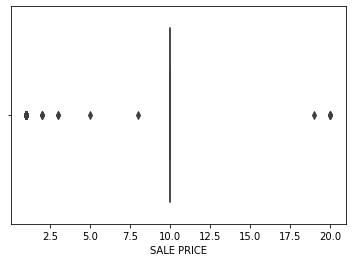

In [ ]:
sns.boxplot(dados[dados['SALE PRICE'] < 100]['SALE PRICE']);

In [ ]:
dados = dados[~((dados['SALE PRICE'] < 100) | (dados['SALE PRICE'] > 500000000))]
dados

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,YEAR BUILT,SALE PRICE
0,1,2,392,6,5,0,1900,6625000.0
3,1,2,402,21,10,0,1913,3936272.0
4,1,2,404,55,6,0,1900,8000000.0
6,1,2,406,32,8,0,1920,3192840.0
9,1,2,387,153,24,0,1920,16232000.0
...,...,...,...,...,...,...,...,...
84543,5,1,7349,34,2,0,1998,450000.0
84544,5,1,7349,78,2,0,1998,550000.0
84545,5,1,7351,60,2,0,1925,460000.0
84546,5,4,7100,28,0,7,2001,11693337.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


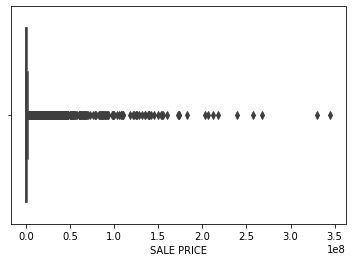

In [ ]:
sns.boxplot(dados['SALE PRICE']);

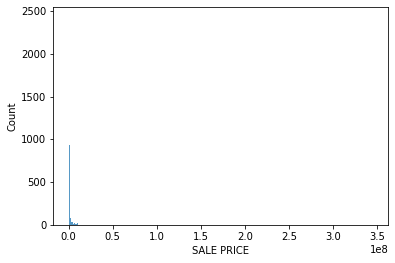

In [ ]:
sns.histplot(dados['SALE PRICE']);

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


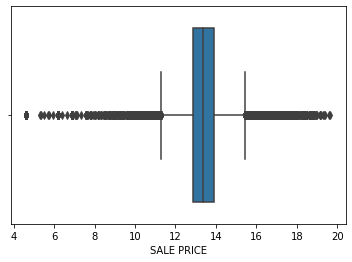

In [ ]:
sns.boxplot(np.log(dados['SALE PRICE']));

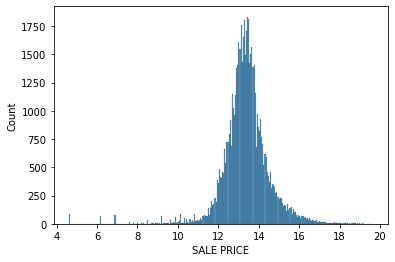

In [ ]:
sns.histplot(np.log(dados['SALE PRICE']));

In [ ]:
df = dados.copy()
df['SALE PRICE'] = np.log(df['SALE PRICE'])

### Modelo de Regressão

Preparando as variáveis categóricas para o modelo

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
colunas_categoricas = ['BOROUGH', 'TAX CLASS AT PRESENT']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns = one_hot_enc.get_feature_names_out())
df

,onehotencoder__BOROUGH_1,onehotencoder__BOROUGH_2,onehotencoder__BOROUGH_3,onehotencoder__BOROUGH_4,onehotencoder__BOROUGH_5,onehotencoder__TAX CLASS AT PRESENT_1,onehotencoder__TAX CLASS AT PRESENT_2,onehotencoder__TAX CLASS AT PRESENT_4,remainder__BLOCK,remainder__LOT,remainder__RESIDENTIAL UNITS,remainder__COMMERCIAL UNITS,remainder__YEAR BUILT,remainder__SALE PRICE
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,392.0,6.0,5.0,0.0,1900.0,15.706361
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,402.0,21.0,10.0,0.0,1913.0,15.185745
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,404.0,55.0,6.0,0.0,1900.0,15.894952
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,406.0,32.0,8.0,0.0,1920.0,14.976421
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,387.0,153.0,24.0,0.0,1920.0,16.602495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58244,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7349.0,34.0,2.0,0.0,1998.0,13.017003
58245,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7349.0,78.0,2.0,0.0,1998.0,13.217674
58246,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7351.0,60.0,2.0,0.0,1925.0,13.038982
58247,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7100.0,28.0,0.0,7.0,2001.0,16.274530


Separando a variável alvo das variáveis explicativas

In [ ]:
x = df.drop('remainder__SALE PRICE', axis = 1)
y = df['remainder__SALE PRICE']

Modificando a escala das variáveis pelo método de padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

Dividindo o conjunto de dados entre treino e teste

In [ ]:
SEED = 113

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.1, random_state = SEED)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf =  RandomForestRegressor(max_depth = 10, random_seed = SEED)
rf.fit(x_treino, y_treino)

R² treino: 0.567310128459376
R² teste: 0.507758152192398


Avaliando o modelo de regressão

In [ ]:
print(f'R² treino: {rf.score(x_treino, y_treino)}')
print(f'R² teste: {rf.score(x_teste, y_teste)}')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
previsao = rf.predict(x_teste)

print(f'MSE: {mean_squared_error(y_teste, previsao)}')
print(f'RMSE: {mean_squared_error(y_teste, previsao, squared=False)}')

MSE: 0.6376802813130388
RMSE: 0.7985488596905256
